<a href="https://colab.research.google.com/github/wangechi-wq/KNN-Naive-Bayes-Classifier/blob/main/KNN_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

Use KNN Algorithm to predict whetehr a passenger survived ot not

### b) Defining the Metric for Success

The model will be appraised succesful if it will be able to predict in the right way whether a passenger survived or not. We will set 80% as our minimum accuracy score for the models.

### c) Understanding the context 

### d) Recording the Experimental Design

The following are the experimental design i used for the successful completion of the project:

1. Importing all the necessary libraries
2. Loading the dataset
3. Reading, cleaning the dataset Performing:
4. Exploratory Data Analysis
5. Creating models using the KNN
6. Challenge the solution 
7. Giving a conclusion and recommendation for the project

### e) Data Relevance

The dataset consist of passenger data and their survival rate where 0 for not surviving, 1 for surviving.

## 2. Reading the Data

In [ ]:
#importing our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the Data from the source i.e. csv
titan_train = pd.read_csv("train.csv")
titan_test = pd.read_csv("test.csv")



## 3. Checking the Data

In [ ]:

# Determining the no. of records in our dataset
#
titan_train.shape


(891, 12)

In [ ]:
titan_test.shape

(418, 11)

In [ ]:
# Previewing the top of our dataset
#
titan_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
titan_test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [ ]:
# Previewing the bottom of our dataset
# 
titan_train.tail(4)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titan_test.tail(4)

In [ ]:
# Checking whether each column has an appropriate datatype
#
titan_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

## 5. Tidying the Dataset

In [ ]:
# Identifying the Missing Data
#
titan_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#checking the percentange for null values in the cabin column
print(titan_train.Cabin.isnull().sum() / len(titan_train))

0.7710437710437711


77% of the data in the cabin column is missing this means we have to drop the column

In [ ]:
#checking the percentange for null values in the age column
print(titan_train.Age.isnull().sum() / len(titan_train))

0.19865319865319866


20% of the data is missing in the age colum which will e filled using the mean age according to the pclass

In [ ]:
#dropping columns that arenot neccesary to our project as well as the cabin colum which has alot of null values
titan_train = titan_train.drop(['PassengerId','Name','Ticket','Cabin'], 1)
titan_train.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
#filling in null values in age column according to the mean age per pclass
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
#dropping the null values in embarked colum which may not have much impact in our results
titan_train.dropna(inplace=True)
titan_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

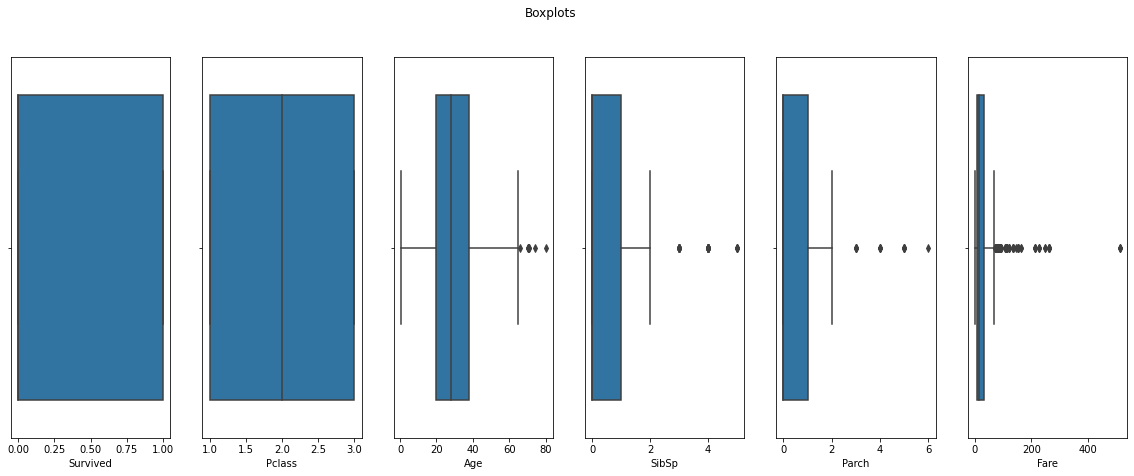

In [ ]:
# Checking for Outliers
#
fig, ((ax1, ax2, ax3,ax4,ax5,ax6)) = plt.subplots(1,6, figsize=(20,7))
fig.suptitle('Boxplots')
sns.boxplot(titan_train['Survived'], ax=ax1)
sns.boxplot(titan_train['Pclass'], ax=ax2)
sns.boxplot(titan_train['Age'], ax=ax3)
sns.boxplot(titan_train['SibSp'], ax=ax4)
sns.boxplot(titan_train['Parch'], ax=ax5)
sns.boxplot(titan_train['Fare'], ax=ax6)
plt.show()

There are a number of outliers which will not be removes since they are necessary for our project

In [ ]:
titan_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

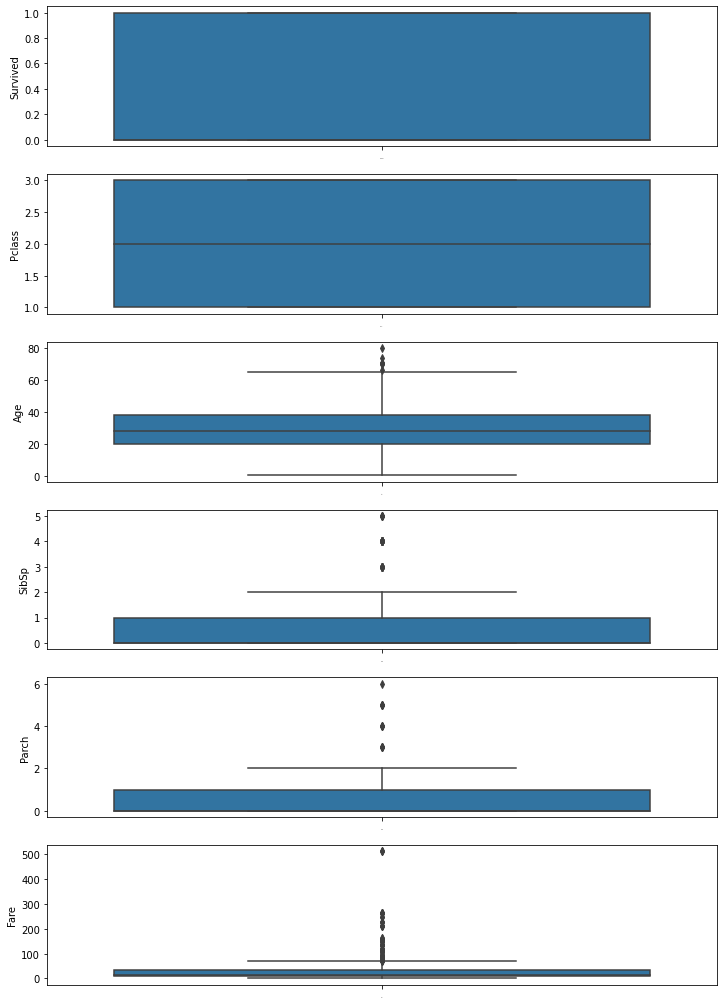

In [ ]:
# Checking for Anomalies
anomalies_columns = ['Survived', 'Pclass','Age', 'SibSp', 'Parch', 'Fare']
fig, ax = plt.subplots(len(anomalies_columns), figsize=(12,18))

for i, col_val in enumerate(anomalies_columns):

    sns.boxplot(y=titan_train[col_val], ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=1)


## 6. Exploratory Analysis

## a) Univariate Analysis

In [ ]:
#checking descriptive statistics of the dataset
titan_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0.5, 1.0, 'Male VS Female')

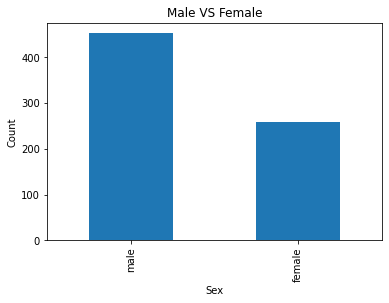

In [ ]:
titan_train['Sex'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("Sex")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Male VS Female")

From the output, male were more than the female

Text(0.5, 1.0, 'Pclass Category count')

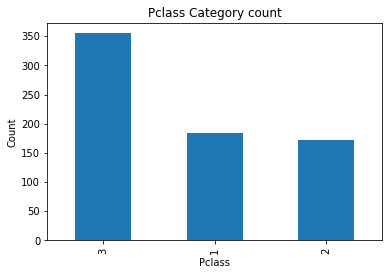

In [ ]:
#plotting the pclass
titan_train['Pclass'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("Pclass")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Pclass Category count")

Ticket class 3 has the highest number of records while ticket clas 2 has the least number of records

Text(0.5, 1.0, 'Parch Category count')

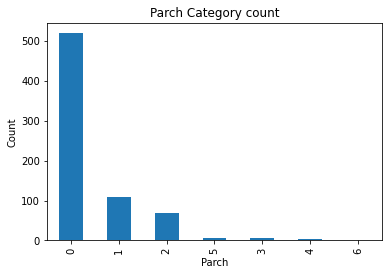

In [ ]:
#plotting the pclass
titan_train['Parch'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("Parch")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Parch Category count")

Those passengers who were not accompanied by parents had the highest number of records while those accompanied by 4 has the least number of records

Text(0.5, 1.0, 'Survival rate')

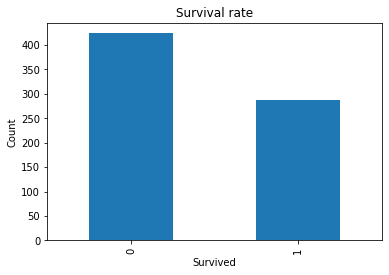

In [ ]:
#plotting the Survived column
titan_train['Survived'].value_counts().plot(kind= 'bar');

# Labelling the axes
plt.xlabel("Survived")
plt.ylabel("Count")

# Giving a title to our Bar chart
plt.title("Survival rate")

The number of those who did not survive is higher than those who survived

## b) Bivariate Analysis

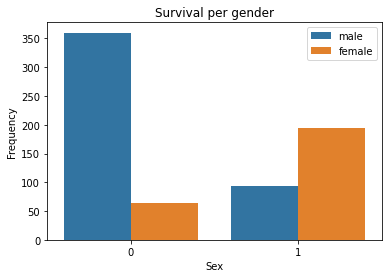

In [ ]:
#Bar plot of sex vs survival
ax = sns.countplot(x=titan_train['Survived'], hue=titan_train['Sex'],data=titan_train,orient="h", alpha=1)
plt.title('Survival per gender')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.legend(["male", "female"])
plt.ylabel('Frequency')
plt.show()

More males did not survive compared to the females


More female survived compared to the male

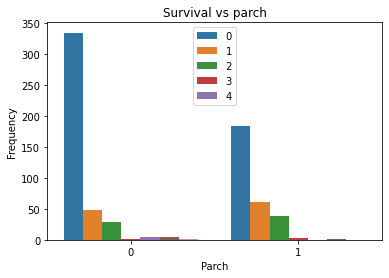

In [61]:
#Bar plot of parch vs survival
ax = sns.countplot(x=titan_train['Survived'], hue=titan_train['Parch'],data=titan_train,orient="h", alpha=1)
plt.title('Survival vs parch')
plt.xlabel('Parch')
plt.xticks(rotation=0)
plt.legend(["0", "1","2","3","4"])
plt.ylabel('Frequency')
plt.show()

Those accompanied by no parent had the highest number of those who did not survive while those who had been accompanied by 4 had the least number of those who did not survive

Those accompanied by no parent had the highest number of those who survived while those who had been accompanied by 4 had the least number of those who did  survive

In [ ]:
titan_train['Pclass'].unique()

array([3, 1, 2])

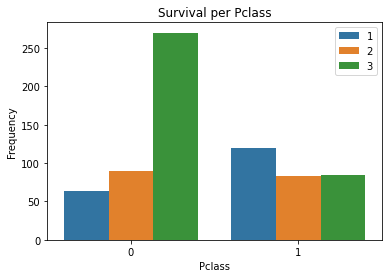

In [ ]:
#Bar plot of Pclass vs survival
ax = sns.countplot(x=titan_train['Survived'], hue=titan_train['Pclass'],data=titan_train,orient="h", alpha=1)
plt.title('Survival per Pclass')
plt.xlabel('Pclass')
plt.xticks(rotation=0)
plt.legend(["1","2","3"])
plt.ylabel('Frequency')
plt.show()

Those who had ticket class 3 had the highest number of those who did not survive while those with ticket class 1 had the least number of those who did not survive

Those who had ticket class 1 had the highest number of those who survived while those with ticket class 3 had the least number of those who survived

In [37]:
titan_train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5])

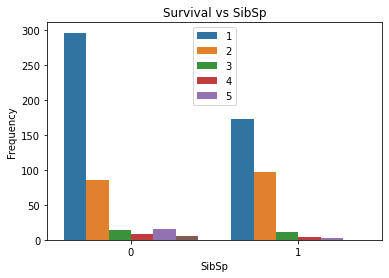

In [38]:
#Bar plot of SibSp vs survival
ax = sns.countplot(x=titan_train['Survived'], hue=titan_train['SibSp'],data=titan_train,orient="h", alpha=1)
plt.title('Survival vs SibSp')
plt.xlabel('SibSp')
plt.xticks(rotation=0)
plt.legend(["1","2","3","4","5"])
plt.ylabel('Frequency')
plt.show()

Those who were accompanied by 1 sibling/spouse had the highest number of records of those who did not survive while thos who were accompanied by 5 siblings have the least no.of records of those who did not survive

Those who were accompanied by 1 sibling/spouse had the highest number of records of those who survived while thos who were accompanied by 5 siblings have the least no.of records of those who survived

In [39]:
#convert categorical data to numerical using the label encoder technique
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()

titan_train['Sex'] = en.fit_transform(titan_train['Sex'])
titan_train['Embarked'] = en.fit_transform(titan_train['Embarked'])
titan_train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


In [40]:
#checking the correlation of data
titan_train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,0.109639
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510
Embarked,-0.181979,0.244145,0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000


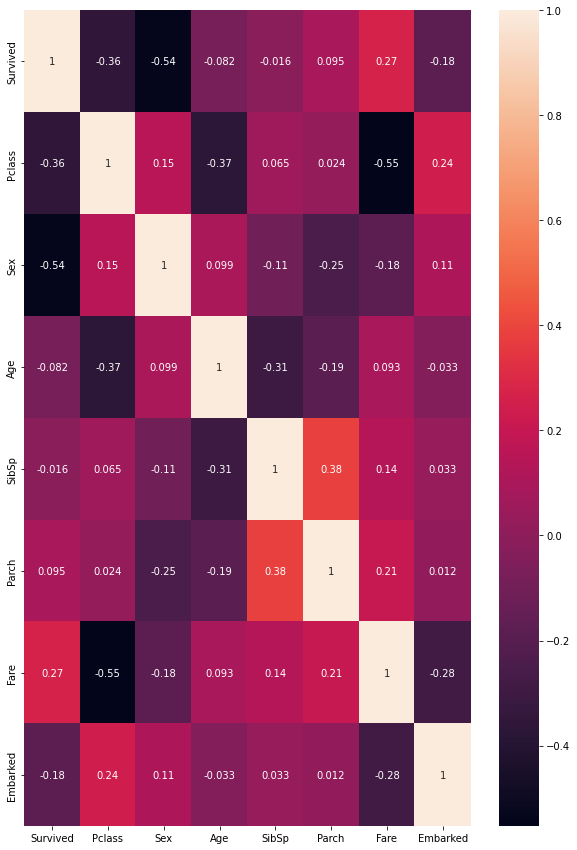

In [42]:
# Plotting correlation using a heatmap
fig,ax = plt.subplots(figsize=(10, 15))
sns.heatmap(titan_train.corr(),annot=True)
plt.show()

## c) Multivariate Analysis

LDA will be used since we have a know target variable and dependent on other variables

In [43]:
#dividing our dataset into features and labels 
X = titan_train.drop(['Survived'], axis=1)
y = titan_train["Survived"].values

In [44]:
#Split the data into a training set and testing set.

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
# Applying the LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [47]:
# Display the coefficient of the reduced columns
lda.coef_

array([[-1.24606523e+00, -3.25281516e+00, -4.23964290e-02,
        -4.16232568e-01, -5.79779056e-02,  2.03822391e-03,
        -2.84300738e-01]])

## 7. Implementing the Solution

# Using KNN Algorithm

In [50]:
#scaling data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
kclf = KNeighborsClassifier(n_neighbors=3)
kclf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
#predicting test data
y_pred= kclf.predict(X_test)

In [54]:
# Evaluating the performance of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , f1_score            
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        82
           1       0.75      0.67      0.71        61

    accuracy                           0.76       143
   macro avg       0.76      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143

[[68 14]
 [20 41]]
The accuracy score of the model is : 0.7622377622377622


In [55]:
# partitioning the data into 70-30 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the outcome

y_pred = clf.predict(X_test)

# Evaluating the performance of the model
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.73      0.71       125
           1       0.58      0.53      0.55        89

    accuracy                           0.64       214
   macro avg       0.63      0.63      0.63       214
weighted avg       0.64      0.64      0.64       214

[[91 34]
 [42 47]]
The accuracy score of the model is : 0.6448598130841121


In [56]:
# partitioning the data into 60-40 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

# Fitting the KNN classifier model to the training data

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


# Predicting the model

y_pred = clf.predict(X_test)

# Evaluating the performance of the model
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print('The accuracy score of the model is :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       169
           1       0.60      0.56      0.58       116

    accuracy                           0.67       285
   macro avg       0.66      0.65      0.65       285
weighted avg       0.67      0.67      0.67       285

[[126  43]
 [ 51  65]]
The accuracy score of the model is : 0.6701754385964912


From the partitions the 80-20 category performed best based on the accuracy score which is 76.22%

Hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights':['uniform', 'distance'], 'algorithm':['ball_tree', 'kd_tree', 'brute'] }
clf = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, cv = 10 ,n_jobs= 1, verbose  = 0)
print('best parameters:', clf.fit(X_train,y_train))

best parameters: GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'weights': ['uniform', 'distance']})


In [58]:
#fittting our model with the best parameters
clff= KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', leaf_size = 30,metric='minkowski',weights='uniform' )
clff.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
#predicting the results.
y_pred = clf.predict(X_test)

#evaluating the accuracy of the model
print('accuracy:', accuracy_score(y_test, y_pred))

accuracy: 0.6456140350877193


After performing hyperparameter tuning, the accuracy score decreased. We can now use another algorith to check which gives the best accuracyscore

## 8. Challenging the solution

we will use random forest algorithm






In [60]:
#Using Random Forest which is an Ensemble algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) 
rf.fit(X_train, y_train)

# Making predictions
y1_pred = rf.predict(X_test)

# Evaluating the model
rf.score(X_train, y_train)

acc_rf = round(rf.score(X_train, y_train) * 100, 2)
print(round(acc_rf,2,), "%")

# Generating cross-validated estimates for each input data point
pred = cross_val_predict(rf, X_train, y_train, cv=3)


print(confusion_matrix(y_train, pred))
print(classification_report(y_train, pred))

90.4 %
[[221  34]
 [ 51 121]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       255
           1       0.78      0.70      0.74       172

    accuracy                           0.80       427
   macro avg       0.80      0.79      0.79       427
weighted avg       0.80      0.80      0.80       427



# Conclusion & Recommendations

Random forest gives a better accuracy score of 90.4% which is higher than KNN that is 76.22%

For this project I would suggest Random forest to be used for better results